In [1]:
# Import all necessary modules
import csv
import tui # Importing the Text User Interface module
import retrieve # Importing the module for file retrieval 
import analyse # Importing the module for data analysis
import visualise # Importing the module for data visualisation
import pandas as pd # Importing pandas for data analysis and manipulation

# Function to read data from a CSV file
def read_data(file_path):
    while True:
        try:
            # Open the CSV file
            with open(file_path, encoding='UTF-8') as csv_file:
                csv_reader = csv.reader(csv_file)
                
                # Skip the header row
                next(csv_file)
                
                # Create an empty list
                data = []
                
                # Iterate over each row in the CSV file and store in the data list
                for row in csv_reader:
                    data.append(row)
                return data # Return the data list
            
        except FileNotFoundError:
            # Use the error() function from tui module to display error message if CSV file is not found
            msg = "File Not Found. Please try again or enter 'quit' to end program\n"
            tui.error(msg)
            return None # Return no value
        
        except Exception as e:
            # Display error message for other forms of errors and exceptions
            print("Error!", e)
            return None

# Define variables to continue to prompt user to enter a file path until a valid path is recognised
retry_number = 0 # Start the retry count at 0
maximum_retries = 3 # Set a maximum number of retries allowed

# A while loop to allow multiple retries as long as it's less than 3
while retry_number <= maximum_retries:
    file_path = input("Please enter the file path or filename to view: ")
    
    # Verify whether the user actually enters any value for the file path
    if not file_path:
        # If no entry is received, refer to the error() function in tui module and print out an error message
        msg = "No entry received. Please enter a valid file path.\n"
        tui.error(msg)
        continue
    
    # Check if user enters 'quit'
    if file_path.lower() == 'quit':
        break # End the loop if user enters 'quit'
    
    # Try to read data from the CSV file using my read_data() function
    data = read_data(file_path)
    
    # Check if CSV file is successfully read
    if data is not None:
        print("\nFile Found! Processing...") #If reading is successful, read data and print the success message
        break # End the loop
    
    retry_number += 1 # Make retry_number increase by 1 each time data reading fails
    if retry_number > maximum_retries:
        # If number of retries exceed maximum retries allowed (3), display the message
        print("Maximum retry attempts reached. Exiting program")

Please enter the file path or filename to view: HR_Metrics.csv

File Found! Processing...


In [2]:
# Function to use pandas to read data from a CSV file
def read_data_pandas(file_path):
    pd_data = pd.read_csv(file_path, header=0, encoding='utf-8')
    return pd_data # Return the DataFrame containing the data read

In [3]:
# Function to receive and process user selection in the retrieve sub-menu
def handle_retrieve_selection(retrieve_selection, HR_data):
    
    # Start a loop that continues until a valid selection is made or 'exit' is entered
    while True:
        
        # Spell out conditions for specific user selections
        if retrieve_selection == "1":
            retrieve.get_employee_details(HR_data)
            
        elif retrieve_selection == "2":
            retrieve.get_job_info(HR_data)
            
        elif retrieve_selection == "3":
            retrieve.get_under_60_hours_employee_info(HR_data)
            
        elif retrieve_selection == "4":
            retrieve.get_salary_info_last_10_years(HR_data)
            
        elif retrieve_selection == "menu":
            return True # Return to main menu
        
        elif retrieve_selection == "exit":
            return False # End the program
        
        else:
            # Prompt user to try again if they enter an invalid selection
            msg = "Please try again.\n"
            tui.error(msg) # Display error message
            retrieve_selection = tui.sub_menu_retrieve() # Ask user for their input again
            continue
        
        retrieve_selection = tui.sub_menu_retrieve() # Get user input to use through the loop again

In [4]:
# Function to handle user selection in the analyse sub-menu
def handle_analyse_selection(analyse_selection, pandas_data):
    
    # Begin a loop that goes on until a valid selection is made or 'exit' is entered
    while True:
        
        # Spell out conditions for specific user selections
        if analyse_selection == "1":
            analyse.compute_top_3_job_roles(pandas_data)
            
        elif analyse_selection == "2":
            analyse.compute_average_monthly_rate(pandas_data)
            
        elif analyse_selection == "3":
            analyse.compute_average_employment_duration(pandas_data)
            
        elif analyse_selection == "4":
            analyse.compute_top_10_earners(pandas_data)
            
        elif analyse_selection == "menu":
            return True # Return to main menu
        
        elif analyse_selection == "exit":
            return False # End the program
        
        else:
            # Prompt user to try again if they enter an invalid selection
            msg = "Please try again.\n"
            tui.error(msg) # Display error message
            analyse_selection = tui.sub_menu_analyse() # Ask user for their input again
            continue
            
        analyse_selection = tui.sub_menu_analyse() # Get user input to use through the loop again

In [5]:
# Function to receive and process user selection in the visualise sub-menu
def handle_visualise_selection(visualise_selection, pandas_data):
    
    # Begin a loop that goes on until a valid selection is made or 'exit' is entered
    while True:
        
        # Spell out conditions for specific user selections
        if visualise_selection == "1":
            visualise.show_employee_proportion_by_education_levels(pandas_data)
        elif visualise_selection == "2":
            visualise.compare_training_frequency_by_education_field(pandas_data)
        elif visualise_selection == "3":
            visualise.show_job_satisfaction_by_job_level_and_department(pandas_data)
        elif visualise_selection == "4":
            visualise.show_average_salary_by_job_role(pandas_data)
        elif visualise_selection == "menu":
            return True # Return to main menu
        elif visualise_selection == "exit":
            return False # End the program
        else:
            # Prompt user to try again if they enter an invalid selection
            msg = "Please try again.\n"
            tui.error(msg) # Display error message
            visualise_selection = tui.sub_menu_visualise() # Ask user for their input again
            continue
            
        visualise_selection = tui.sub_menu_visualise() # Get user input to use through the loop again

╔══════════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║                                                                                                              ║
║                                           WELCOME TO THE HR DESK!                                            ║
║                                                                                                              ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════════════════╝
Want to explore and delve deep into our HR records? Please select an option to proceed:

    [1]          Retrieve data regarding our employees and job roles
    [2]          Analyse our employee data and generate insights
    [3]          Use charts to visualize our employee data
    [exit]       Exit the program
    
1
Enter an option of your choice:

    [1]          Get an employee's personal details based on their employee num

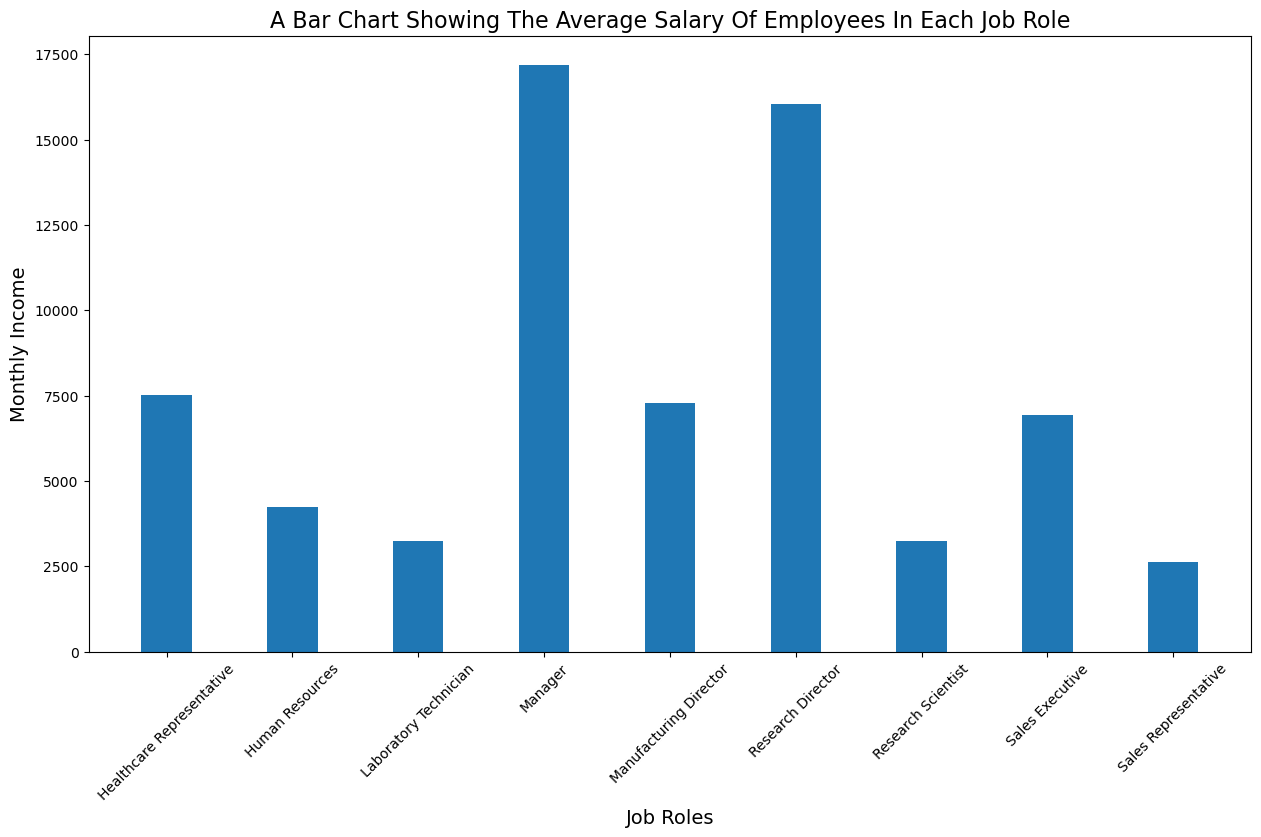

Enter an option of your choice:

    [1]          The proportion of employees in the company based on their education levels
    [2]          The frequency of employee training in each education field
    [3]          How job satisfaction scores change across job levels for each department
    [4]          The average salary of employees in each job role
    [menu]       Return to the main menu
    [exit]       Exit the program
    


In [ ]:
# Function to run the entire program
def run():
    
    # Display a welcome message from the TUI module
    tui.welcome()
    
    # Collect retrieved data from read_data() function into a variable
    HR_data = read_data(file_path)
    
    # Collect retrieved data from read_data_pandas() function into a variable
    pandas_data = read_data_pandas(file_path)
    
    while True:
        user_selection = tui.main_menu() # Display main menu and receive user selection
        
        # Conditions for different user selection in the main menu
        if user_selection == "1":
            retrieve_selection = tui.sub_menu_retrieve()
            
            # End the program if a condition in the retrieve sub-menu is returning False
            if not handle_retrieve_selection(retrieve_selection, HR_data):
                break
                
        elif user_selection == "2":
            analyse_selection = tui.sub_menu_analyse()
            
            # End the program if a condition in the analyse sub-menu is returning False
            if not handle_analyse_selection(analyse_selection, pandas_data):
                break 
                
        elif user_selection == "3":
            visualise_selection = tui.sub_menu_visualise()
            
            # End the program if a condition in the visualise sub-menu is returning False
            if not handle_visualise_selection(visualise_selection, pandas_data):
                break
                
        elif user_selection == "exit":
            break # End the program if user enters 'exit'
            
        else:
            # Prompt user to try again if they enter an invalid selection
            msg = "Please try again.\n"
            tui.error(msg)

# Run the main program
if __name__ == '__main__':
    run()